This project works on Spam Detection in SMS the data has been acquired from KEGGLE open source website for DATA.

In [332]:
#import necessary libries
import pandas as pd
import numpy as np

In [333]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [334]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [335]:
df.shape

(5572, 5)

! Steps Involved
1. Data Cleaning. 
2. EDA. 
3. Text Preprocessing. 
4. Model Building
5. Model Evaulation
6. Model Improvement
7. Deploy

# Data Cleaning

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [337]:
# Drop last 3 columns
df = df.drop(columns= ['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'])

In [338]:
df =df.rename(columns={'v1':'target','v2':'text'})

In [339]:
df.isna().sum() # Check for na 

target    0
text      0
dtype: int64

In [340]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [341]:
# Lable Encode the target
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [342]:
df.sample(5)

,target,text
2023,0,Is there any movie theatre i can go to and wat...
3305,0,HI DARLIN I FINISH AT 3 DO U 1 2 PICK ME UP OR...
5157,0,K k:) sms chat with me.
3741,0,Hey i'm bored... So i'm thinking of u... So wa...
4047,0,Lol or I could just starve and lose a pound by...


In [343]:
# Check for duplictes
df.duplicated().sum()

np.int64(403)

In [344]:
df = df.drop_duplicates()

In [345]:
df.duplicated().sum()

np.int64(0)

In [346]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EdA

In [347]:
import seaborn as sns
import matplotlib.pyplot as plt

In [348]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

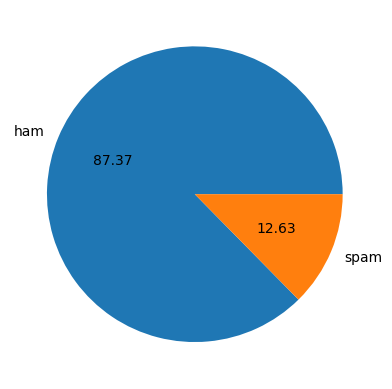

In [349]:
plt.pie(df['target'].value_counts(),autopct='%0.2f', labels=['ham','spam'])
plt.show()

In [350]:
# Data is inbalanced
# create two new columns with number of characters, number of words and number of sentences

In [351]:
df['num_char'] = df['text'].apply(len)

In [352]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [353]:
df.iloc[0].text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [354]:
df['text'].apply(lambda x : len(x.split()))

0       20
1        6
2       28
3       11
4       13
        ..
5567    30
5568     8
5569    10
5570    26
5571     6
Name: text, Length: 5169, dtype: int64

In [355]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dhanrajtentu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dhanrajtentu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [356]:
len(nltk.word_tokenize('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
))

24

In [357]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [358]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [359]:
df['num_sentance']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [360]:
df.head()

,target,text,num_char,num_words,num_sentance
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [361]:
df[['num_char','num_words', 'num_sentance']].describe()

,num_char,num_words,num_sentance
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [362]:
df[df['target']==0][['num_char','num_words', 'num_sentance']].describe() #ham 

,num_char,num_words,num_sentance
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [363]:
df[df['target']==1][['num_char','num_words', 'num_sentance']].describe() #spam 

,num_char,num_words,num_sentance
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [364]:
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

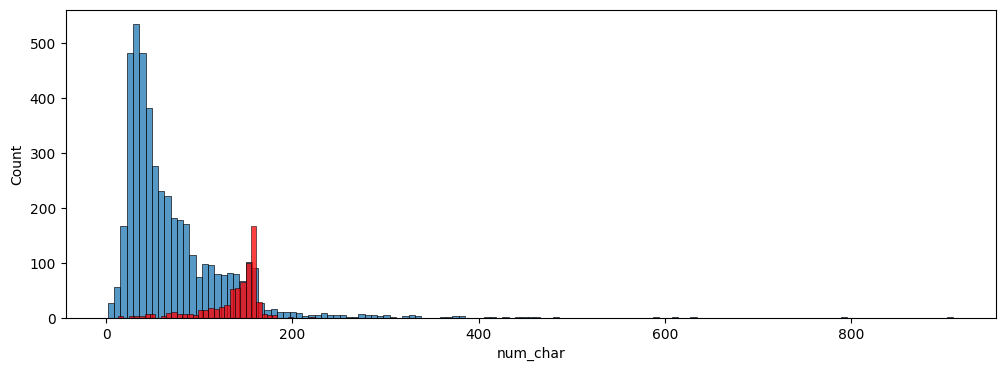

In [365]:
# Hist plot char
plt.figure(figsize=(12,4))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')
plt.show()

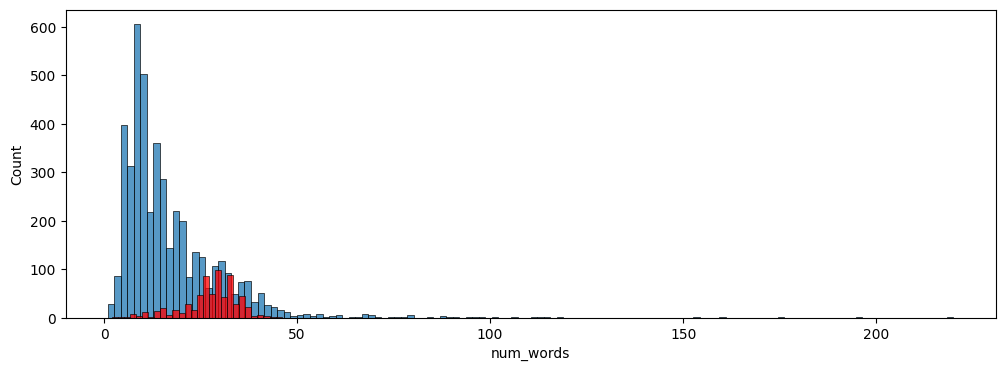

In [366]:
# Hist plot words
plt.figure(figsize=(12,4))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()

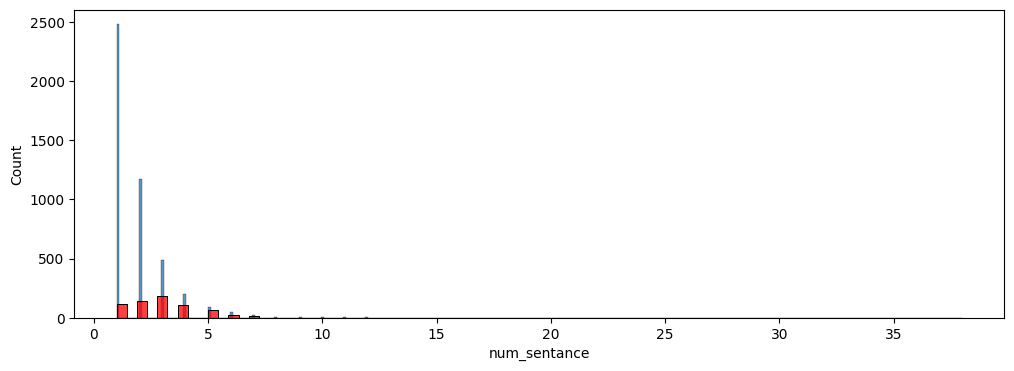

In [367]:
# Hist plot sentance
plt.figure(figsize=(12,4))
sns.histplot(df[df['target']==0]['num_sentance'])
sns.histplot(df[df['target']==1]['num_sentance'],color='red')
plt.show()

In [368]:
df

,target,text,num_char,num_words,num_sentance
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


<Figure size 600x400 with 0 Axes>

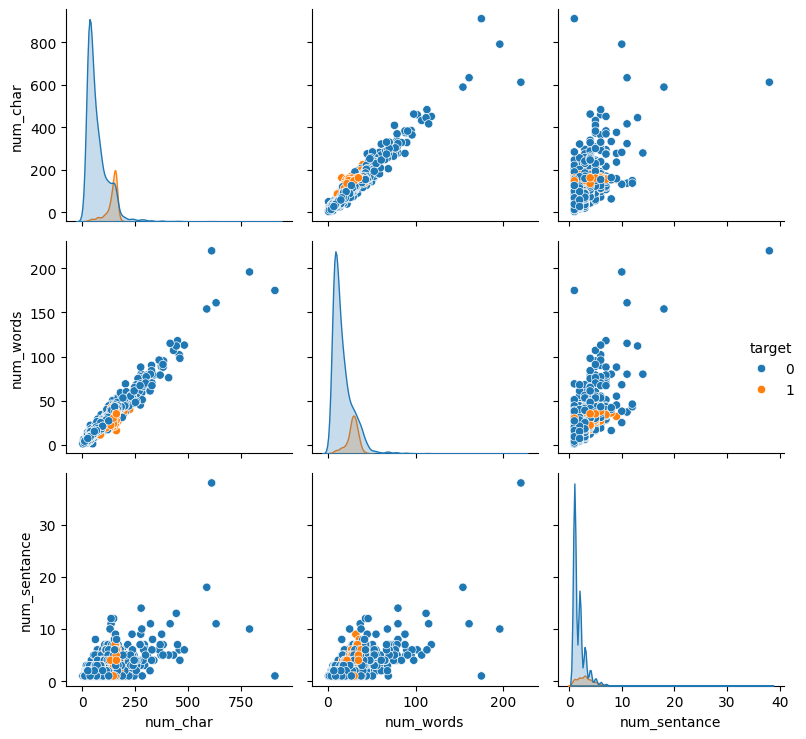

In [369]:
plt.figure(figsize=(6,4))
sns.pairplot(df,hue='target')
plt.tight_layout()
plt.show()

<Axes: >

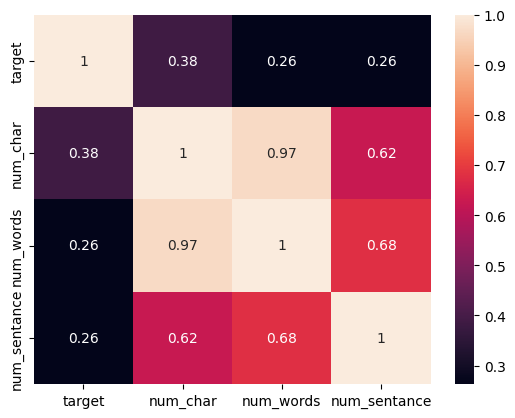

In [370]:
sns.heatmap(df.corr(numeric_only=True),annot=True)


## Data PreProcessing

In [371]:
# Lowercase
# Tokenize --> split the sentance to words
# Remove punctuation, stopwords, special characters
# Stemming/Lemmatizaaton --> reduce the words to base forms

In [372]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhanrajtentu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [373]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [374]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

ps.stem('working')

'work'

In [375]:
from curses.ascii import isalnum


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear() 
    for i in text:
        
        y.append(ps.stem(i))   

    return ' '.join(y)

In [376]:
transform_text(df.iloc[2434].text)

'packag program well'

In [377]:
df['transformed_text'] = df.text.apply(transform_text)

In [378]:
df.head()

,target,text,num_char,num_words,num_sentance,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [379]:
from wordcloud import WordCloud
wc = WordCloud(width = 800, height=800, background_color='white')

In [380]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

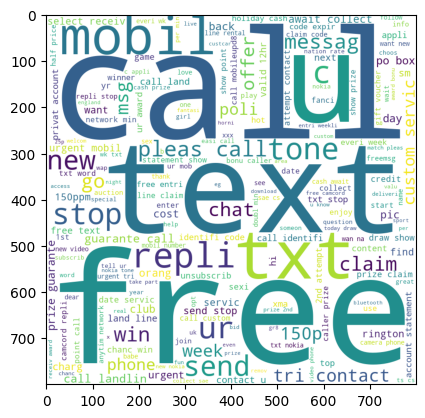

In [381]:
plt.imshow(spam_wc)
plt.show()

In [382]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

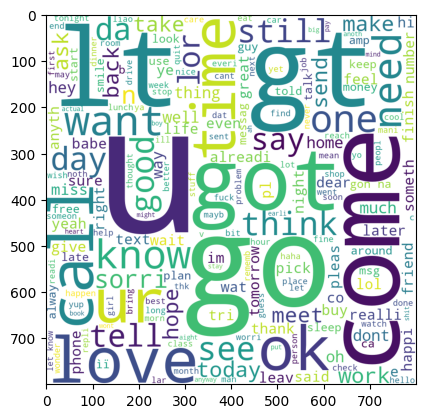

In [383]:
plt.imshow(ham_wc)
plt.show()

In [384]:
df.head()

,target,text,num_char,num_words,num_sentance,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [385]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [386]:
len(spam_corpus)

9939

In [387]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

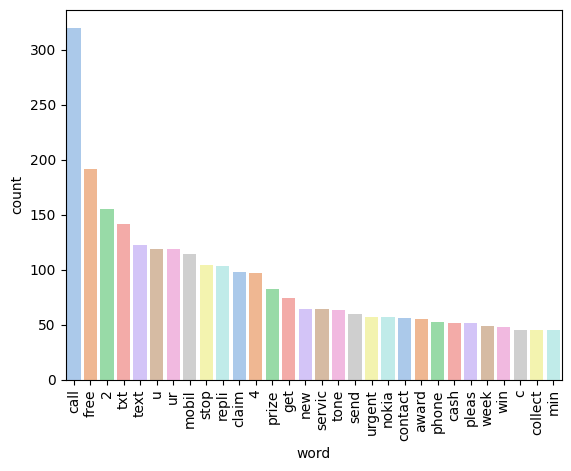

In [388]:
spam_data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word','count'])
sns.barplot(data=spam_data,x='word',y='count',palette='pastel',hue='word',legend=False)
plt.xticks(rotation=90)
plt.show()

In [389]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [390]:
len(ham_corpus)

35404

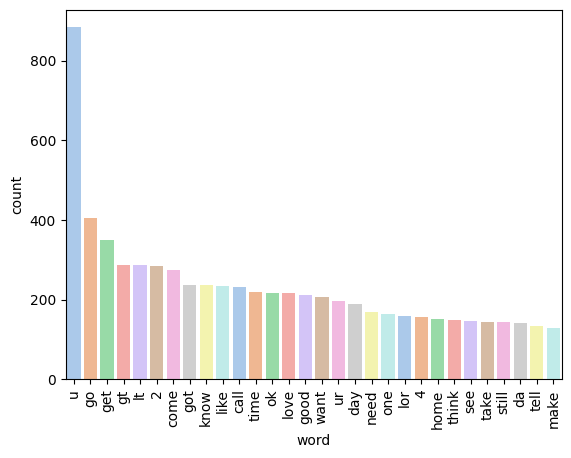

In [391]:
ham_data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word','count'])
sns.barplot(data=ham_data,x='word',y='count',palette='pastel',hue='word',legend=False)
plt.xticks(rotation=90)
plt.show()

## Model Building

In [392]:
# Machine learning models can’t read words — they understand numbers.
# So we convert text → numbers

In [393]:
df.head()

,target,text,num_char,num_words,num_sentance,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [394]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer 

#cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [395]:
X.shape

(5169, 3000)

In [396]:
y = df['target'].values

In [397]:
from sklearn.model_selection import train_test_split

# Model Training

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=0.8)

In [398]:
# Import algorithm
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
# Evaulation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()



In [399]:
# Train and tes
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
# Evaulation
print("Evaulation of Gaussian Navie Bayes:")
print(f"Accuracy_score: {round(accuracy_score(y_test,y_pred1),2)}")
print(f"Precision Score: {round(precision_score(y_test,y_pred1),2)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test,y_pred1)}")
print("--"* 50)

print("Evaulation of Multinomial Navie Bayes:")
print(f"Accuracy_score: {round(accuracy_score(y_test,y_pred2),2)}")
print(f"Precision Score: {round(precision_score(y_test,y_pred2),2)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test,y_pred2)}")
print("--"* 50)

print("Evaulation of Bernoulli Navie Bayes:")
print(f"Accuracy_score: {round(accuracy_score(y_test,y_pred3),2)}")
print(f"Precision Score: {round(precision_score(y_test,y_pred3),2)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test,y_pred3)}")

Evaulation of Gaussian Navie Bayes:
Accuracy_score: 0.86
Precision Score: 0.5
Confusion Matrix: 
[[769 120]
 [ 24 121]]
----------------------------------------------------------------------------------------------------
Evaulation of Multinomial Navie Bayes:
Accuracy_score: 0.97
Precision Score: 0.99
Confusion Matrix: 
[[888   1]
 [ 27 118]]
----------------------------------------------------------------------------------------------------
Evaulation of Bernoulli Navie Bayes:
Accuracy_score: 0.97
Precision Score: 0.96
Confusion Matrix: 
[[884   5]
 [ 23 122]]


/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/dhanrajtentu/Library/Python/3.9/lib/pytho

In [400]:
# tfidf --> Multinomial Navi Bayes 

In [401]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier


In [402]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rmc = RandomForestClassifier(n_estimators =50, random_state=2)
abc = AdaBoostClassifier(n_estimators =50, random_state=2)
bc = BaggingClassifier(n_estimators =50, random_state=2)
etc = ExtraTreesClassifier(n_estimators =50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators =50, random_state=2)

In [403]:
clfs = {
    'SVC' : svc,
    "LogisticRegression" : lrc,
    "DecisionTreeClassifier" : dtc,
    "KNeighborsClassifier": knc,
    "RandomForestClassifier": rmc,
    "AdaBoostClassifier" : abc,
    "BaggingClassifier" : bc,
    "ExtraTreesClassifier": etc,
    "GradientBoostingClassifier": gbc
}

In [404]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy, precision

In [405]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.9548872180451128)

In [406]:
accuracy_scores = []
precision_scores = []

for name,classifier in clfs.items():
    current_accuracy, current_precision = train_classifier(classifier,X_train,y_train,X_test,y_test)
    #print(f"Classifier: {name}")
    #print(f"Accuracy: {current_accuracy}")
    #print(f"Precision: {current_precision}")
    #print("-"*50)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [407]:
scores_df = pd.DataFrame({'Algorithm':clfs.keys(),"Accuracy":accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [408]:
scores_df

,Algorithm,Accuracy,Precision
3,KNeighborsClassifier,0.910058,1.000000
7,ExtraTreesClassifier,0.977756,0.984127
4,RandomForestClassifier,0.971954,0.975410
8,GradientBoostingClassifier,0.946809,0.968750
0,SVC,0.976789,0.954887
6,BaggingClassifier,0.962282,0.884058
1,LogisticRegression,0.946809,0.868852
2,DecisionTreeClassifier,0.934236,0.834783
5,AdaBoostClassifier,0.915861,0.808511


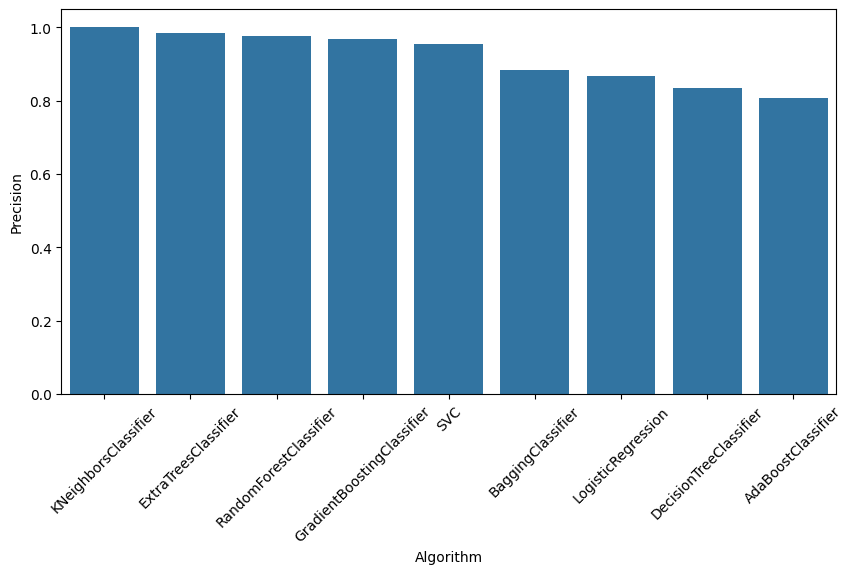

In [409]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm', y='Precision', data=scores_df)
plt.xticks(rotation=45)
plt.show()


## Model Improvement

In [410]:
# Checked the accuracy and precision when converted the text to vector with Bag of words ( countervectorizor) 
# Checked the accuracy and precision when converted the text to vector with TFI DI 
# Found Better results with TFIDf in comparision with bag of words

# have given importance to precision rather than accuracy as we have inbalanced data

# Change the tfidf max features